In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=sns.load_dataset('Tips')

In [4]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [8]:
df.shape

(244, 7)

In [9]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [10]:
df.groupby('day').count()

,total_bill,tip,sex,smoker,time,size
day,,,,,,
Fri,19,19,19,19,19,19
Sat,87,87,87,87,87,87
Sun,76,76,76,76,76,76
Thur,62,62,62,62,62,62


In [17]:
df2=df.groupby('day').sum()

In [18]:
df2['percent']=100*df2['tip']/df2['total_bill']

In [19]:
df2

,total_bill,tip,size,percent
day,,,,
Fri,325.88,51.96,40,15.944519
Sat,1778.40,260.40,219,14.642375
Sun,1627.16,247.39,216,15.203791
Thur,1096.33,171.83,152,15.673201


In [22]:
df4=df.groupby(['day','size']).sum()

In [25]:
df4['percent']=100*df4['tip']/df4['total_bill']

In [26]:
df4

total_bill     tip    percent
day  size                               
Fri  1           8.58    1.92  22.377622
     2         261.15   42.31  16.201417
     3          15.98    3.00  18.773467
     4          40.17    4.73  11.774956
Sat  1          10.32    2.00  19.379845
     2         892.37  133.43  14.952318
     3         459.17   68.36  14.887732
     4         388.39   53.61  13.803136
     5          28.15    3.00  10.657194
Sun  2         684.84  109.86  16.041703
     3         332.76   46.81  14.067196
     4         480.39   73.58  15.316722
     5          81.00   12.14  14.987654
     6          48.17    5.00  10.379905
Thur 1          10.07    1.83  18.172790
     2         727.53  117.24  16.114799
     3          76.64   10.77  14.052714
     4         149.75   21.09  14.083472
     5          41.19    5.00  12.138869
     6          91.15   15.90  17.443774

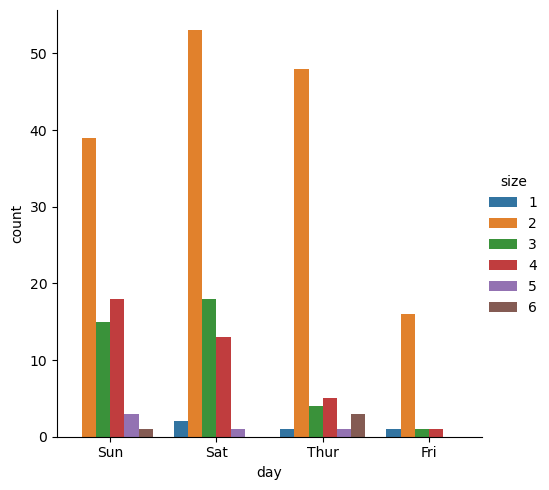

In [28]:
sns.catplot(x='day', hue="size",kind="count",data=df)

In [31]:
df.replace({'sex':{'Male':0,'Female':1},'smoker':{'No':0,'Yes':1}},inplace=True);df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,1,0,Sun,Dinner,2
1,10.34,1.66,0,0,Sun,Dinner,3
2,21.01,3.50,0,0,Sun,Dinner,3
3,23.68,3.31,0,0,Sun,Dinner,2
4,24.59,3.61,1,0,Sun,Dinner,4


In [37]:
days=pd.get_dummies(df['day'])
df=pd.concat([df,days],axis=1)

In [38]:
days.sample(5)

,Fri,Sat,Sun,Thur
104,0,1,0,0
160,0,0,1,0
206,0,1,0,0
188,0,0,1,0
174,0,0,1,0


In [41]:
times=pd.get_dummies(df['time'])
df=pd.concat([df,times],axis=1)

In [42]:
df

,total_bill,tip,sex,smoker,day,time,size,Fri,Sat,Sun,Thur,Dinner,Lunch
0,16.99,1.01,1,0,Sun,Dinner,2,0,0,1,0,1,0
1,10.34,1.66,0,0,Sun,Dinner,3,0,0,1,0,1,0
2,21.01,3.50,0,0,Sun,Dinner,3,0,0,1,0,1,0
3,23.68,3.31,0,0,Sun,Dinner,2,0,0,1,0,1,0
4,24.59,3.61,1,0,Sun,Dinner,4,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,0,0,Sat,Dinner,3,0,1,0,0,1,0
240,27.18,2.00,1,1,Sat,Dinner,2,0,1,0,0,1,0
241,22.67,2.00,0,1,Sat,Dinner,2,0,1,0,0,1,0
242,17.82,1.75,0,0,Sat,Dinner,2,0,1,0,0,1,0


<AxesSubplot:>

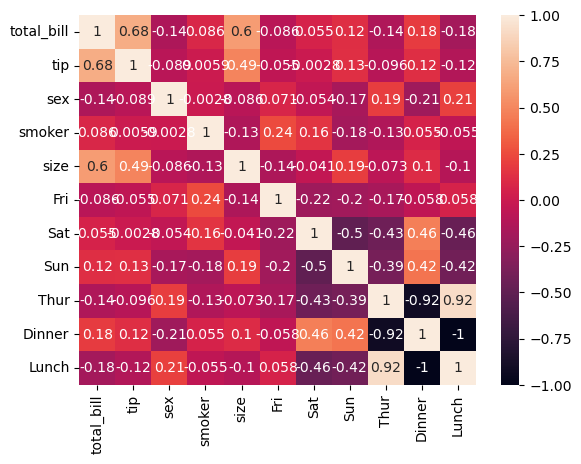

In [44]:
my_correlation=df.corr()
sns.heatmap(my_correlation,annot=True)

In [45]:
x= df[['total_bill','size']]
y=df[['tip']]

In [46]:
x

,total_bill,size
0,16.99,2
1,10.34,3
2,21.01,3
3,23.68,2
4,24.59,4
...,...,...
239,29.03,3
240,27.18,2
241,22.67,2
242,17.82,2


In [50]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn import metrics

In [52]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

In [53]:
x_train

,total_bill,size
206,26.59,3
13,18.43,4
136,10.33,2
107,25.21,2
111,7.25,1
...,...,...
231,15.69,3
9,14.78,2
134,18.26,2
188,18.15,3


In [54]:
y_train

,tip
206,3.41
13,3.00
136,2.00
107,4.29
111,1.00
...,...
231,3.00
9,3.23
134,3.25
188,3.50


In [56]:
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [57]:
predictions=regressor.predict(x_test)

In [58]:
x_test

,total_bill,size
226,10.09,2
229,22.12,2
122,14.26,2
74,14.73,2
156,48.17,6
...,...,...
79,17.29,2
193,15.48,2
120,11.69,2
73,25.28,2


In [59]:
predictions

array([[2.03450143],
       [2.99968614],
       [2.3690667 ],
       [2.4067755 ],
       [6.32857761],
       [4.02669276],
       [5.71717005],
       [5.17317877],
       [3.77075434],
       [2.94595289],
       [2.55520374],
       [4.54902154],
       [2.07782643],
       [2.00160653],
       [3.85896529],
       [2.65148151],
       [2.78466577],
       [2.54076207],
       [2.24711485],
       [2.9194765 ],
       [1.82750421],
       [2.96598892],
       [4.5890936 ],
       [2.8167802 ],
       [2.41479865],
       [5.61124265],
       [2.61377272],
       [2.43325189],
       [2.23106856],
       [2.49021624],
       [3.37998335],
       [3.20748567],
       [4.26257332],
       [2.00962967],
       [2.22465004],
       [2.86890882],
       [2.29766069],
       [3.50195704],
       [2.56162226],
       [3.40565743],
       [2.02246671],
       [2.0328968 ],
       [1.84595746],
       [3.09676623],
       [2.12115143],
       [2.38992689],
       [3.21151909],
       [2.692

<AxesSubplot:ylabel='Count'>

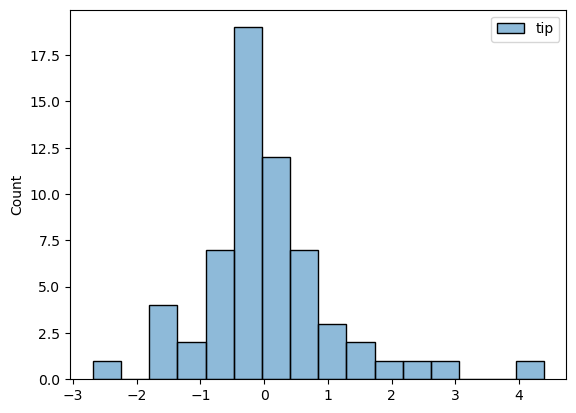

In [60]:
sns.histplot(y_test-predictions)

In [61]:
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,predictions))
print('Mean Squared Error:',metrics.mean_squared_error(y_test,predictions))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test,predictions)))

Mean Absolute Error: 0.7254163397104926
Mean Squared Error: 1.1671424279783393
Root Mean Squared Error: 1.0803436619790665


In [66]:
new_customer=np.array([16.99,2]).reshape(1,-1)
regressor.predict(new_customer)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[2.58809864]])

In [70]:
regressor.coef_

array([[0.08023148, 0.30971535]])

In [69]:
regressor.intercept_

array([0.60553509])